In [1]:
import pandas as pd
import numpy as np
import os
import wfdb
import ast
import ecg_plot
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_hr)]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:

path = 'D:\\Semester 7\\FYP\\PTB-xl_data\\'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

print('data shpae:', X.shape)
Y[['scp_codes']]
Y

100%|██████████| 21837/21837 [03:49<00:00, 95.30it/s] 


data shpae: (21837, 1000, 12)


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [4]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21837 entries, 1 to 21837
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21837 non-null  float64
 1   age                           21748 non-null  float64
 2   sex                           21837 non-null  int64  
 3   height                        6983 non-null   float64
 4   weight                        9429 non-null   float64
 5   nurse                         20328 non-null  float64
 6   site                          21819 non-null  float64
 7   device                        21837 non-null  object 
 8   recording_date                21837 non-null  object 
 9   report                        21837 non-null  object 
 10  scp_codes                     21837 non-null  object 
 11  heart_axis                    13332 non-null  object 
 12  infarction_stadium1           5626 non-null   object 
 13  infarc

In [5]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [6]:
X

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [7]:
print("Dataset Descriptive Analysis")
Y.describe().transpose()

Dataset Descriptive Analysis


,count,mean,std,min,25%,50%,75%,max
patient_id,21837.0,11255.005953,6234.132489,302.0,5982.0,11423.0,16614.0,21797.0
age,21748.0,59.836307,16.953125,2.0,50.0,62.0,72.0,95.0
sex,21837.0,0.478912,0.499567,0.0,0.0,0.0,1.0,1.0
height,6983.0,166.708292,10.864935,6.0,160.0,166.0,174.0,209.0
weight,9429.0,70.997561,15.875146,5.0,60.0,70.0,80.0,250.0
nurse,20328.0,2.292503,3.254786,0.0,0.0,1.0,3.0,11.0
site,21819.0,1.547229,4.169753,0.0,0.0,1.0,2.0,50.0
validated_by,12426.0,0.747948,1.183269,0.0,0.0,1.0,1.0,11.0
strat_fold,21837.0,5.505335,2.875306,1.0,3.0,6.0,8.0,10.0


In [8]:
#Finding Null Values
null_values = Y.isnull().sum().sort_values(ascending=False)
percent = (Y.isnull().sum()/Y.isnull().count()).sort_values(ascending=False)*100
percent = percent[percent>0]
percent

electrodes_problems    99.862618
infarction_stadium2    99.528323
pacemaker              98.658241
burst_noise            97.192838
baseline_drift         92.640931
extra_beats            91.051884
static_noise           85.062051
infarction_stadium1    74.236388
height                 68.022164
weight                 56.820992
validated_by           43.096579
heart_axis             38.947658
nurse                   6.910290
age                     0.407565
site                    0.082429
dtype: float64

<Axes: xlabel='None', ylabel='None'>

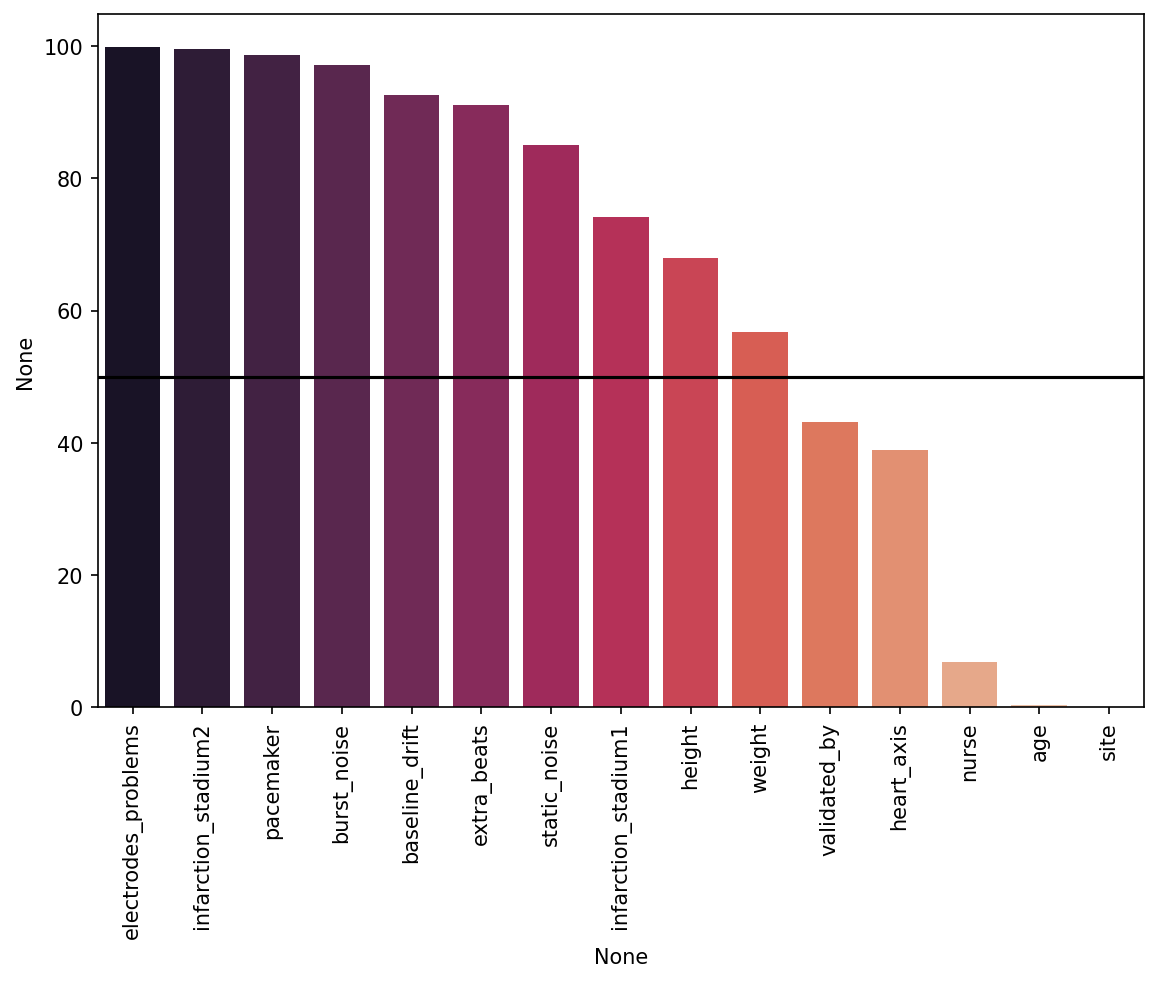

In [9]:
plt.figure(figsize=(9,6),dpi=150)
plt.xticks(rotation=90)
plt.axhline(50,color='black')
sns.barplot(x=percent.index,y=percent,palette="rocket")

In [10]:
# Number of Missing values
pd.options.display.max_rows = 80
pd.DataFrame({'Train': Y.isnull().sum(), 'Type': Y.dtypes}, index=Y.columns)

,Train,Type
patient_id,0,float64
age,89,float64
sex,0,int64
height,14854,float64
weight,12408,float64
nurse,1509,float64
site,18,float64
device,0,object
recording_date,0,object
report,0,object


<Axes: >

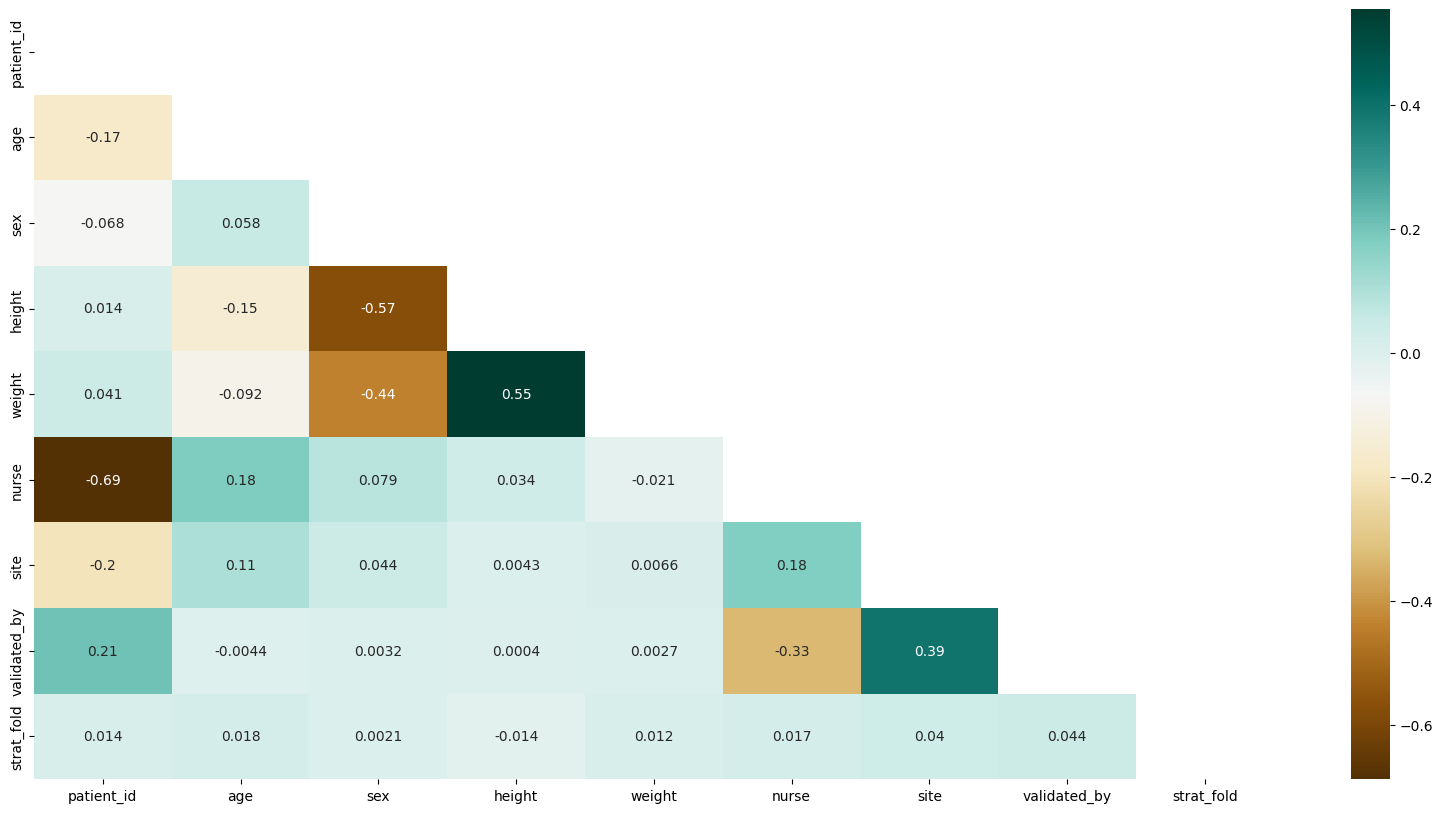

In [12]:
# Select only numeric columns
Y_numeric = Y.select_dtypes(include=[np.number])

# Finding the relations between the variables.
plt.figure(figsize=(20,10))
matrix = np.triu(Y_numeric.corr())
sns.heatmap(Y_numeric.corr(), cmap="BrBG", annot=True, mask=matrix)

In [13]:
# Total number of rows and columns
print(f"Training Set:\nNumber of Rows: {Y.shape[0]}, Number of Columns: {Y.shape[1]}")

Training Set:
Number of Rows: 21837, Number of Columns: 27


In [14]:
# Find columns with text values
object_dataset = Y.select_dtypes('object')
object_dataset.columns

Index(['device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'baseline_drift',
       'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats',
       'pacemaker', 'filename_lr', 'filename_hr'],
      dtype='object')

In [15]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.columns
agg_df.tail(50)

(44, 12)


,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [32]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
    
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

ecg_id
39       [STTC, MI]
45        [CD, HYP]
50         [CD, MI]
77         [CD, MI]
87       [CD, STTC]
            ...    
21815      [CD, MI]
21821    [CD, NORM]
21827    [STTC, MI]
21828    [STTC, MI]
21829    [CD, NORM]
Name: diagnostic_superclass, Length: 5158, dtype: object

In [33]:
df = Y['diagnostic_superclass'].apply(pd.Series)

In [34]:
df

,0,1,2,3
ecg_id,,,,
1,NORM,NaN,NaN,NaN
2,NORM,NaN,NaN,NaN
3,NORM,NaN,NaN,NaN
4,NORM,NaN,NaN,NaN
5,NORM,NaN,NaN,NaN
...,...,...,...,...
21833,STTC,NaN,NaN,NaN
21834,NORM,NaN,NaN,NaN
21835,STTC,NaN,NaN,NaN


In [50]:


# Assuming your DataFrame is named df
# Replace 'Class' with the actual column name where your class information is stored

# Group by ECG ID and count unique classes
unique_ecg_counts = df.groupby('ecg_id')['diagnostic_superclass'].nunique()

# Filter for ECG IDs with only one unique class
unique_ecg_ids = unique_ecg_counts[unique_ecg_counts == 1].index.tolist()

# Display the count of unique ECG IDs
unique_ecg_count = len(unique_ecg_ids)
print("Count of  ECG IDs belonging No class:", unique_ecg_count)



Count of  ECG IDs belonging No class: 407


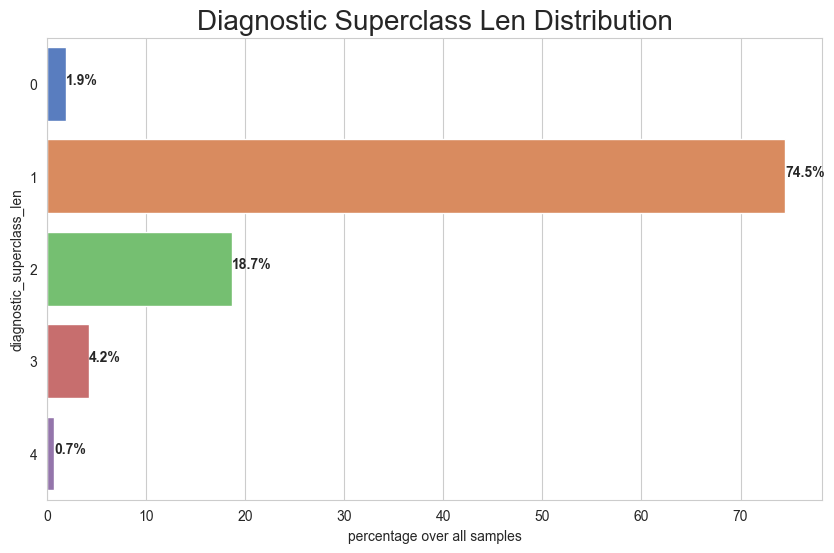

In [17]:
vc = Y['diagnostic_superclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_superclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [18]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_STTC, sub_NST_]
28                    [sub_STTC, sub_NST_]
39           [sub_NST_, sub_STTC, sub_IMI]
45       [sub_RAO/RAE, sub_IRBBB, sub_RVH]
50                     [sub_IVCD, sub_LMI]
                       ...                
21821                [sub_IRBBB, sub_NORM]
21827                  [sub_IMI, sub_ISCA]
21828                  [sub_IMI, sub_ISCA]
21829                [sub_IRBBB, sub_NORM]
21832            [sub_IVCD, sub_LAFB/LPFB]
Name: diagnostic_subclass, Length: 6191, dtype: object

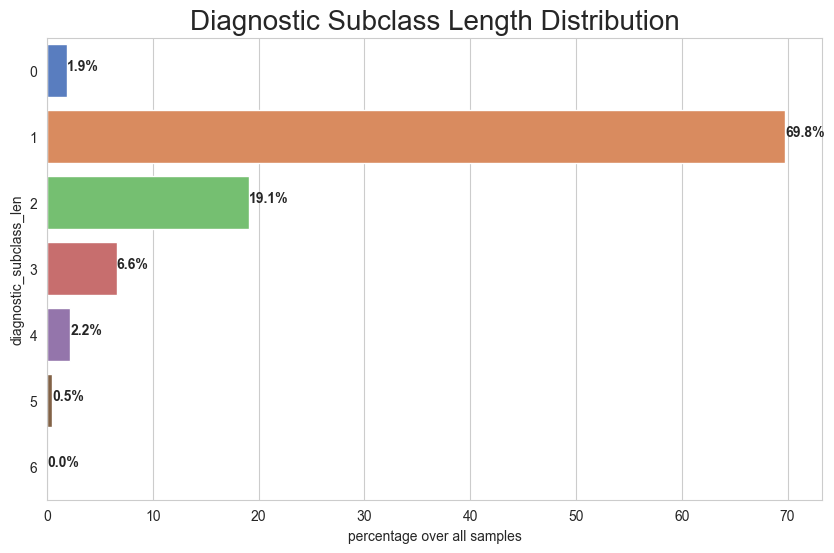

In [19]:
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [20]:
Y.columns.tolist()

['patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr',
 'diagnostic_superclass',
 'diagnostic_superclass_len',
 'diagnostic_subclass',
 'diagnostic_subclass_len']

In [21]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
superclass_cols = all_superclass.unique()
superclass_cols

array(['NORM', 'MI', 'STTC', 'HYP', 'CD'], dtype=object)

In [22]:
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
subclass_cols = all_subclass.unique()
subclass_cols

array(['sub_NORM', 'sub_IMI', 'sub_STTC', 'sub_NST_', 'sub_LVH',
       'sub_LAFB/LPFB', 'sub_RAO/RAE', 'sub_IRBBB', 'sub_RVH', 'sub_IVCD',
       'sub_LMI', 'sub_AMI', 'sub__AVB', 'sub_ISCA', 'sub_ISC_',
       'sub_SEHYP', 'sub_ISCI', 'sub_CRBBB', 'sub_CLBBB', 'sub_LAO/LAE',
       'sub_ILBBB', 'sub_WPW', 'sub_PMI'], dtype=object)

In [23]:
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex'] # could add more columns as features

In [24]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1
            
        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]
    
    for sc in update_cols:
        y_selected[sc] = 0
        
    cls_updt = ClassUpdate(update_cols)
    
    y_selected = y_selected.apply(cls_updt, axis=1)
    
    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [25]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), X, Y, update_cols, meta_cols)
y_all

,age,sex,NORM,MI,STTC,HYP,CD,sub_NORM,sub_IMI,sub_STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,67.0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
21835,59.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [53]:
x_all.shape

(21837, 1000, 12)

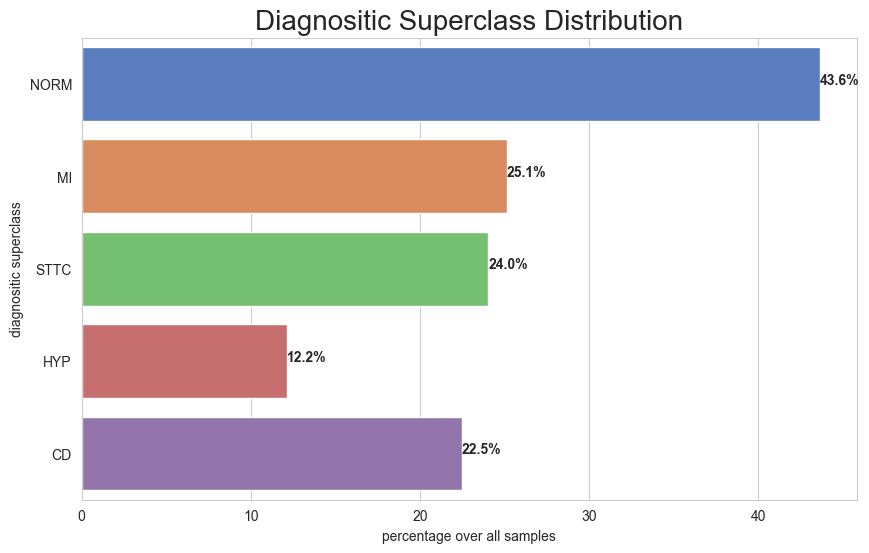

In [26]:
vc = y_all[superclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Superclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic superclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

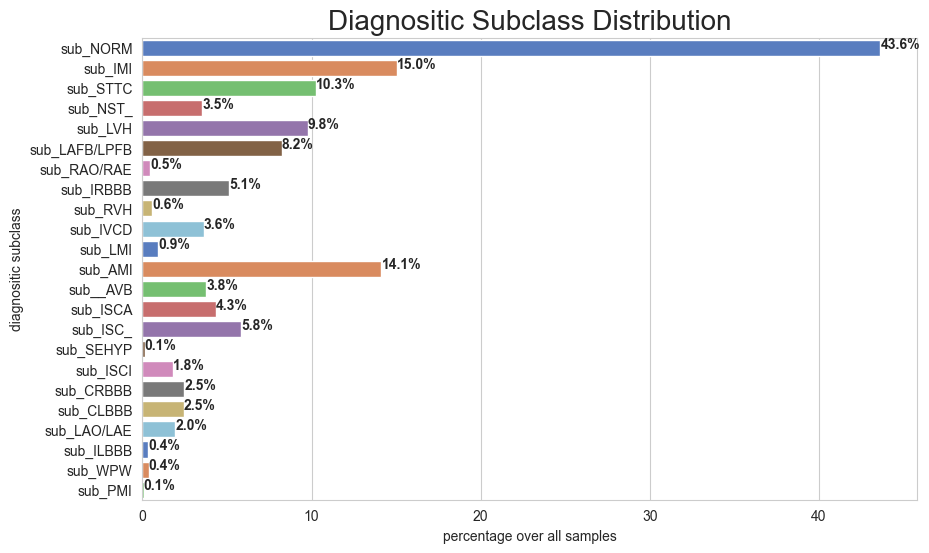

In [27]:
vc = y_all[subclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Subclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic subclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

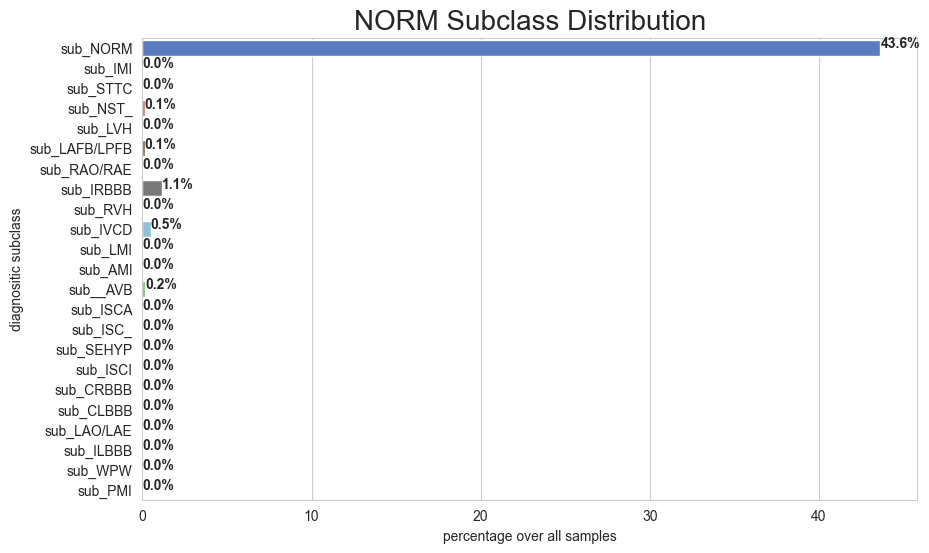

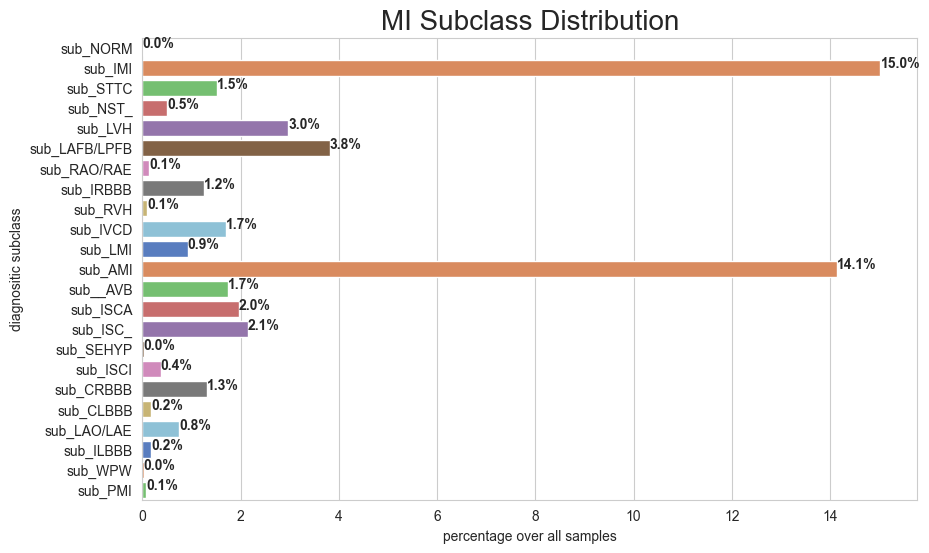

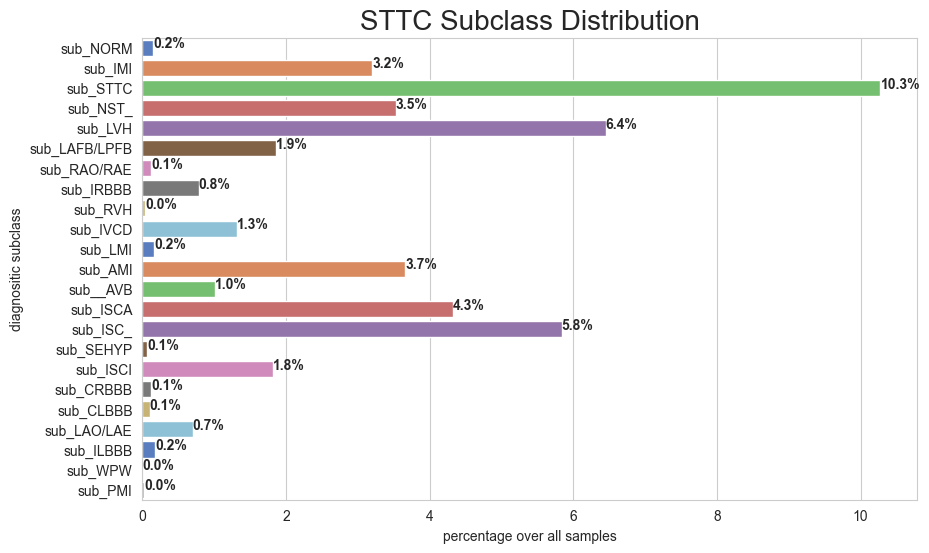

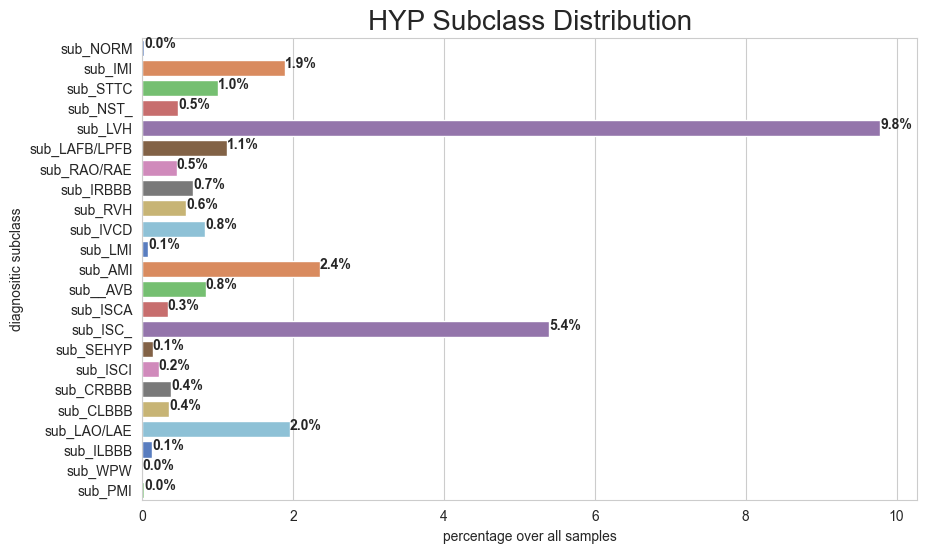

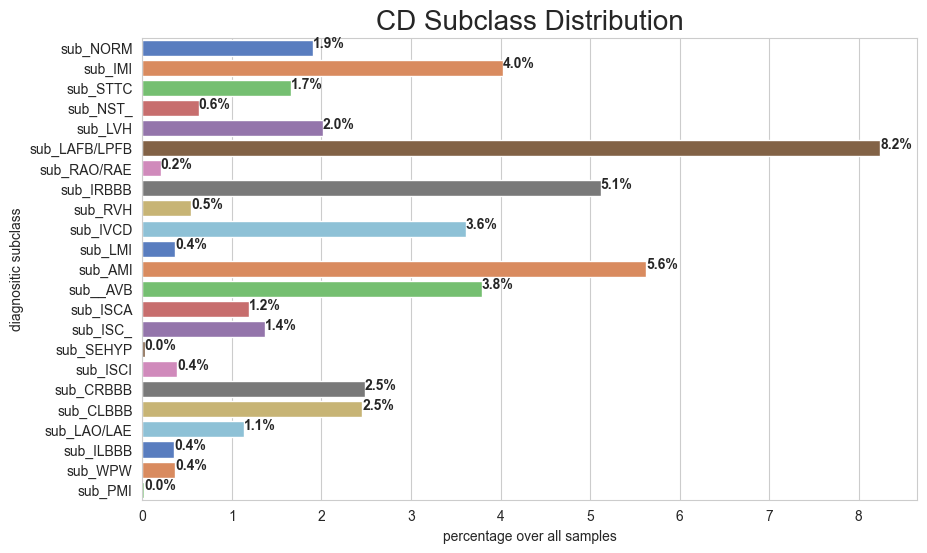

In [28]:
for superclass in superclass_cols:
    
    vc = y_all.loc[y_all[superclass] == 1][subclass_cols].sum(axis=0)
    
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
    ax.set_title("{} Subclass Distribution".format(superclass), fontsize=20)
    ax.set_xlabel ("percentage over all samples")
    ax.set_ylabel ("diagnositic subclass")
    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

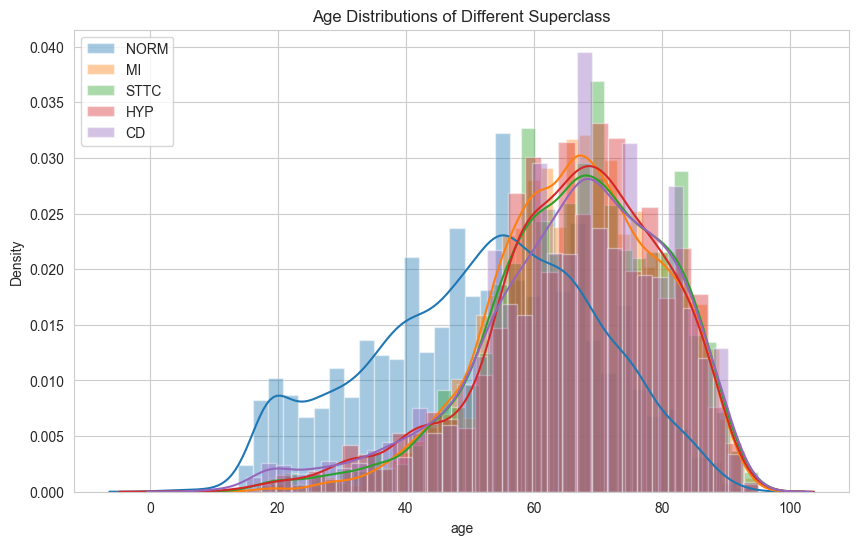

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Age Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1]['age']   
    sns.distplot(data, label=superclass)


plt.legend(loc='upper left')
plt.show()

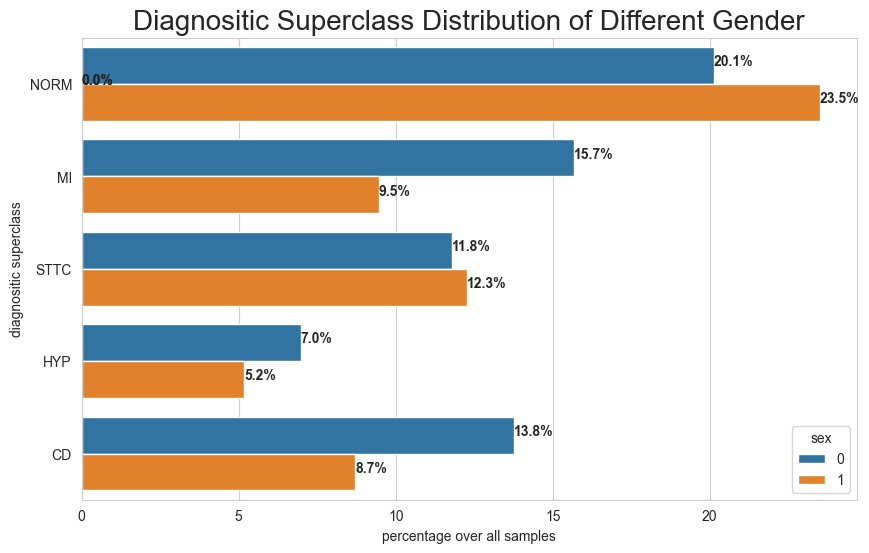

In [30]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
    
ax.set_title("Diagnositic Superclass Distribution of Different Gender", fontsize=20)

all_index, all_count, all_values = [], [], []
for sex in y_all.sex.unique():
    vc = y_all.loc[y_all.sex == sex][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [sex]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['sex'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="sex",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

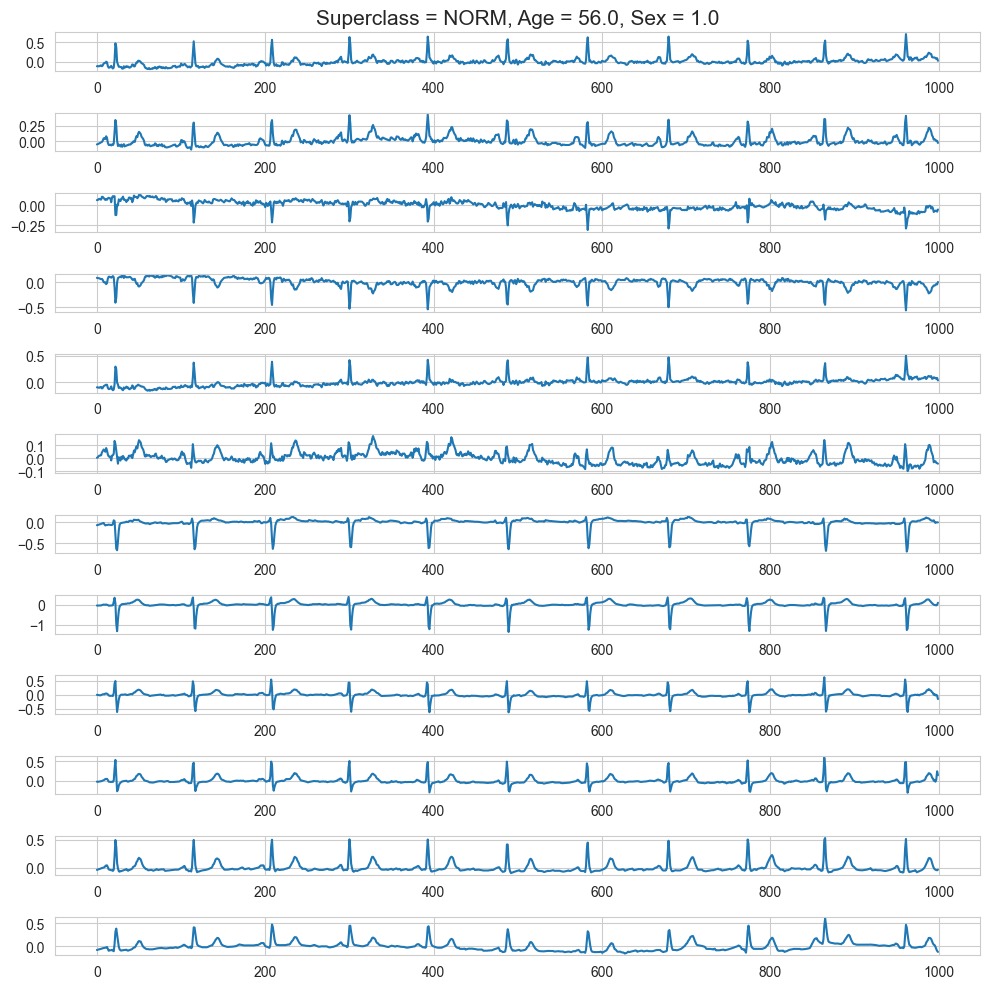

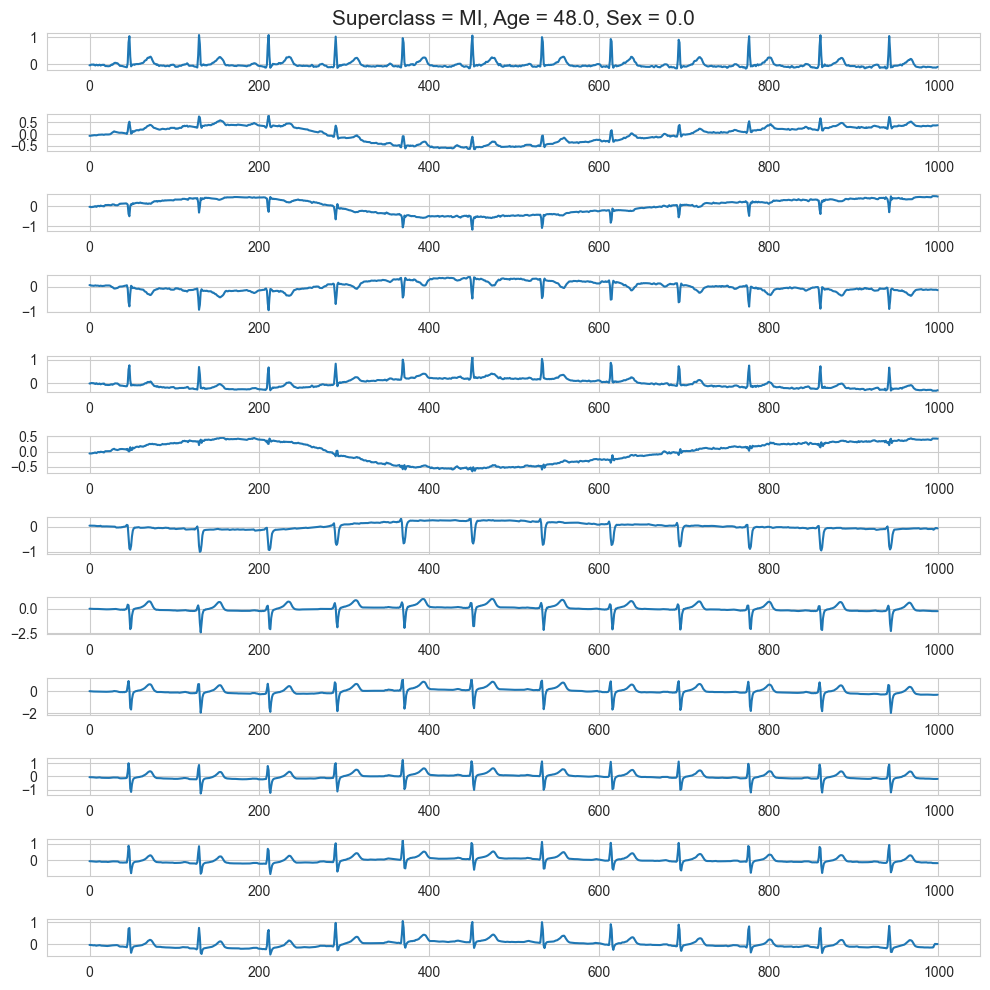

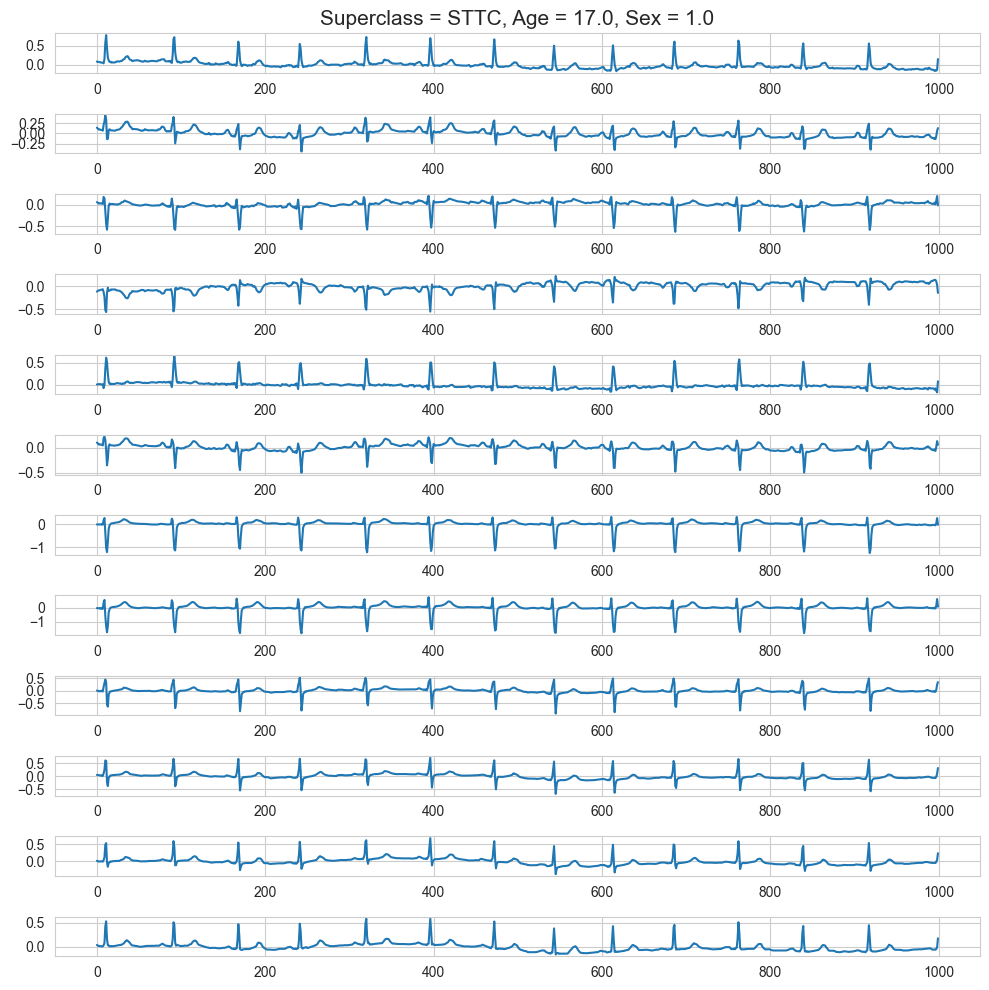

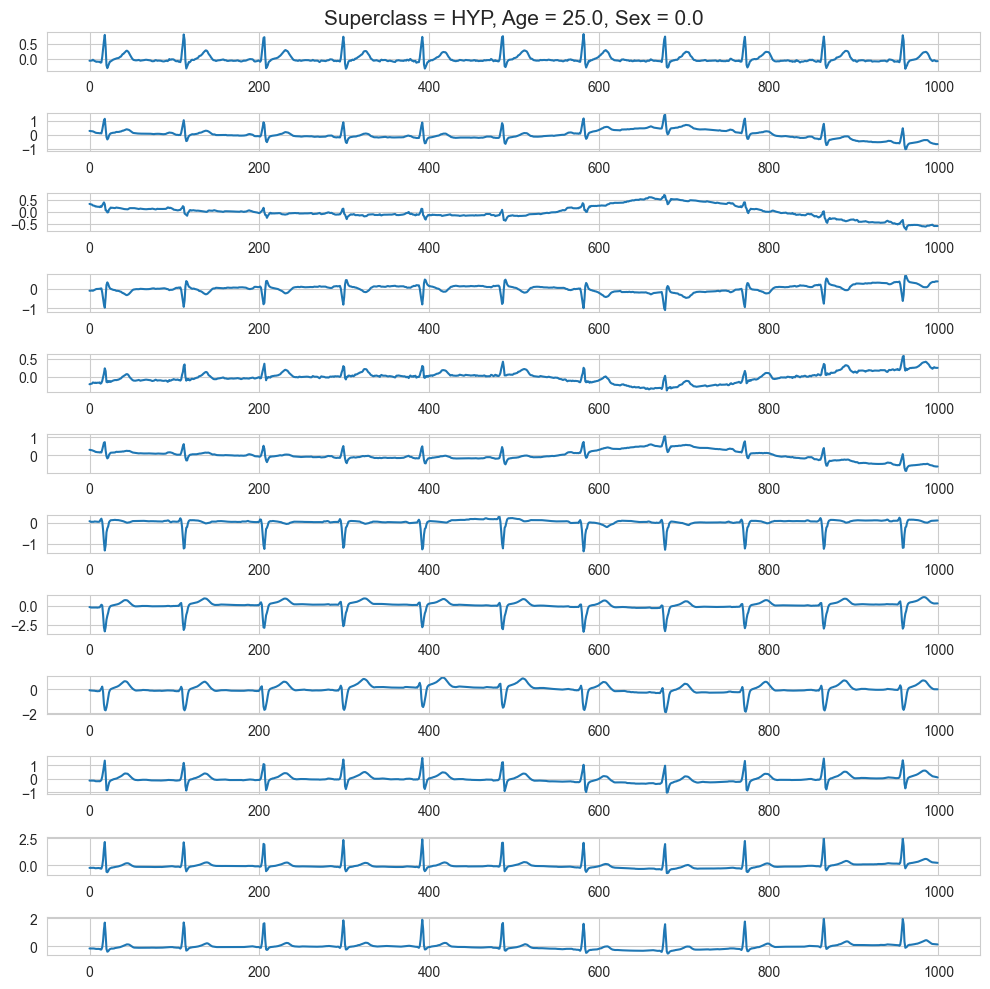

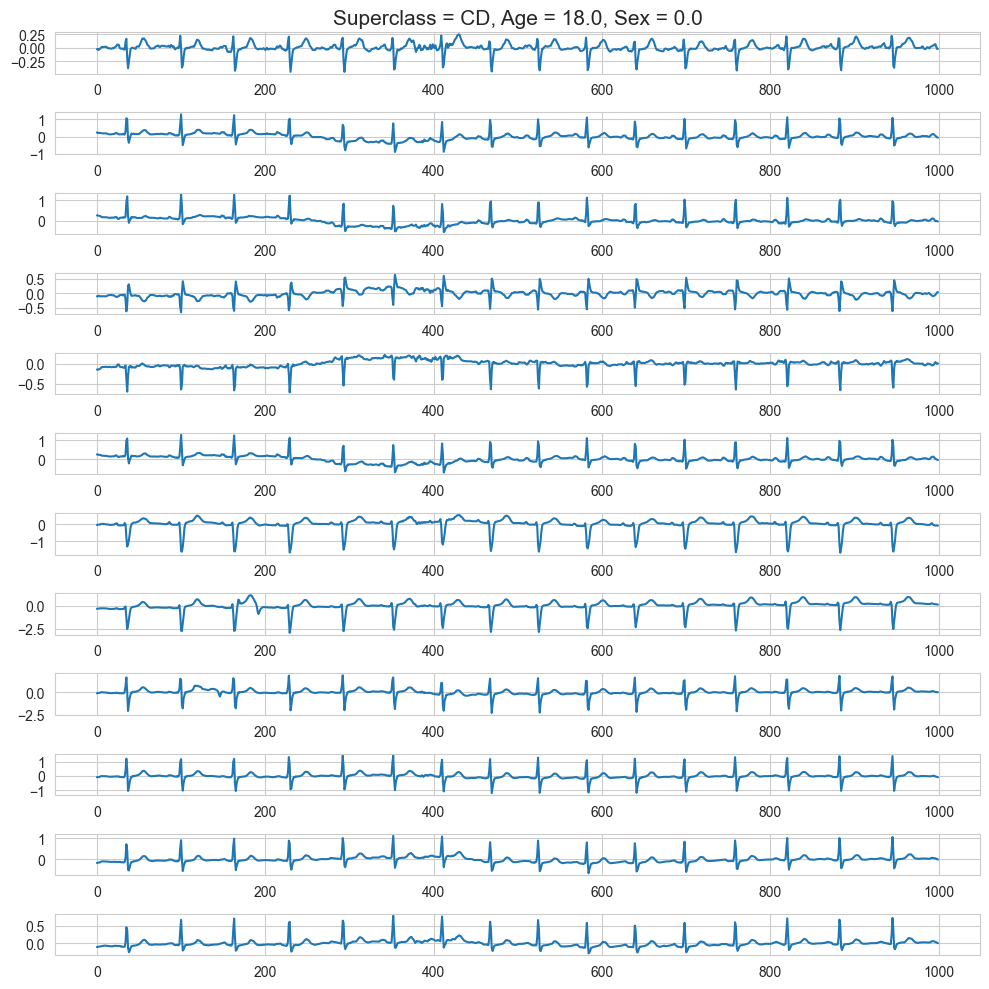

In [47]:
sample_num = 1

for superclass in superclass_cols:
    filt = y_all[superclass] == 1
    y_selected = y_all.loc[filt]
    x_selected = x_all[filt]
    
    for i in range(sample_num):
        y_ = y_selected.iloc[i]
        x_ = x_selected[i]
        
        #display(y_)
        #print(y_.shape, x_.shape); assert False
        bar, axes = plt.subplots(x_.shape[1], 1, figsize=(10,10))
        title = "Superclass = {}, Age = {}, Sex = {}".format(superclass, 
                                                                                                                           y_['age'],
                                                                                                                           y_['sex'])
        axes[0].set_title(title, fontsize=15)
        
        for c in np.arange(x_.shape[1]):
            sns.lineplot(x=np.arange(x_.shape[0]), y=x_[:, c], ax=axes[c])
        
        plt.tight_layout()
        plt.show()
        #assert False